# 1: Radiación del Cuerpo Negro
# a. Escriba un código para hacer la gráfica de la densidad de energía por unidad de frecuencia, como función de la longitud de onda. Haga curvas para temperaturas de 10000 K, 8000 K, 5000 K y 3000 K.

Para esta parte, se obtuvo la ecuación de densidad de energía por unidad de frecuencia, como función de la longitud del libro "Atmospheric Science" de John Wallace y Peter Hobbs (2006) , la cual se muestra a continuación:

$$u_{\lambda}(T) =  \frac{C_1}{\pi \cdot \lambda^5(e^{\frac{C_2}{\lambda T}}-1)}$$

Donde $\lambda$ es la longitud de onda [m] 

T es la temperatura [K]  

$C_1$ es una constante de radiación de $3.7418*10^-16$ [$W m^2$]

$C_2$ es una constante de radiación de $1.4388*10^-2$ [$m K$]

Para el código, nos inspiramos y guiamos del video "MetPy Mondays #252 - Blackbody Radiation and the Plank Function" del canal de YouTube "Unidata". Este está disponible en el siguiente link: 

https://www.youtube.com/watch?v=FdGfPX43gBM



In [2]:
#imports necesarios
%pip install metpy
import numpy as np
from matplotlib import pyplot as plt
from metpy.units import units
#Constantes
pi = np.pi

T1 = 3000 * units.kelvin
T2 = 5000 * units.kelvin
T3 = 8000 * units.kelvin
T4 = 10000 * units.kelvin
c1 = 3.74e-16 * units('W m^2')
c2 = 1.45e-2 * units('m K')





[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Densidad de energía por unidad de frecuencia, como función de la longitud de onda')

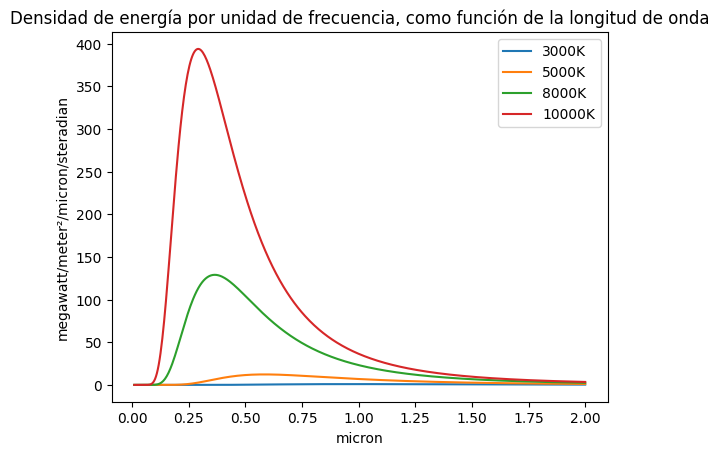

In [3]:
def densidad(T, l, c1, c2):
    num = c1
    denom = (l**5)*((np.e**(c2/(l*T)))-1)*pi

    return num/denom

lambda_min = 0.01 * units.micron
lambda_max = 2 * units.micron
lambda_max = lambda_max.to(lambda_min.units)

Lambda_final = np.linspace(lambda_min.m, lambda_max.m, 500) * lambda_min.units

Tt1 = densidad(T1, Lambda_final, c1, c2)
Tt1 = Tt1.to('MW m^-2 micron^-1 steradian^-1')
Tt2 = densidad(T2, Lambda_final, c1, c2)
Tt2 = Tt2.to('MW m^-2 micron^-1 steradian^-1')
Tt3 = densidad(T3, Lambda_final, c1, c2)
Tt3 = Tt3.to('MW m^-2 micron^-1 steradian^-1')
Tt4 = densidad(T4, Lambda_final, c1, c2)
Tt4 = Tt4.to('MW m^-2 micron^-1 steradian^-1')
plt.plot(Lambda_final, Tt1, label = '3000K')
plt.plot(Lambda_final, Tt2, label = '5000K')
plt.plot(Lambda_final, Tt3, label = '8000K')
plt.plot(Lambda_final, Tt4, label = '10000K')
plt.legend()
plt.title('Densidad de energía por unidad de frecuencia, como función de la longitud de onda')

# (b) 
Calcule la longitud de onda en el pico de cada curva del punto anterior y determine a qué parte del espectro electromagnético corresponde.


Para este punto, se encontrará el máximo valor de densidad de energía en los arrays creados para la graficación anterior. Para esto, se encuentra el índice del valor máximo de cada array $Tt_i$, para hallar la longitud de onda relacionada a esta valor

In [4]:
#Estandarizar unidades para evitar complicaciones (pasar a arrays numericos)
Lambda_final = Lambda_final.m
Tt1 = Tt1.m
Tt2 = Tt2.m
Tt3 = Tt3.m
Tt4 = Tt4.m

In [5]:






def max_local(Tt, Lambda_final):
    maximo = np.max(Tt)
    indice = np.where(Tt == maximo)
    Lambda_final[indice]
    return Lambda_final[indice]*1000

max1 = round(max_local(Tt1, Lambda_final)[0], 2)
max2 = round(max_local(Tt2, Lambda_final)[0],2)
max3 = round(max_local(Tt3, Lambda_final)[0], 2)
max4 = round(max_local(Tt4, Lambda_final)[0], 2)

str1 = "La longitud de onda en el pico de emisión para una temperatura de 3000K es de " + str(max1) + " nm"
str2 = "La longitud de onda en el pico de emisión para una temperatura de 5000K es de " + str(max2) + " nm"
str3 = "La longitud de onda en el pico de emisión para una temperatura de 8000K es de " + str(max3) + " nm"
str4 = "La longitud de onda en el pico de emisión para una temperatura de 10000K es de " + str(max4) + " nm"
print(str1)
print(str2)
print(str3)
print(str4)

La longitud de onda en el pico de emisión para una temperatura de 3000K es de 975.09 nm
La longitud de onda en el pico de emisión para una temperatura de 5000K es de 584.27 nm
La longitud de onda en el pico de emisión para una temperatura de 8000K es de 364.93 nm
La longitud de onda en el pico de emisión para una temperatura de 10000K es de 293.15 nm


Como evidenciado en el códgio anterior...

Para 3000K, un pico de 975.09 nm se encuentra en el infrarojo cercano

Para 5000K, un pico de 584.27 nm se encuentra en el espectro visible (alguna tonalidad de amarillo)

Para 8000K, un pico de 364.93 nm se encuentra en el ultravioleta cercano

Para 10000K, un pico de 293.15 nm se encuentra en el ultravioleta cercano

# (c) 
Grafíque una de las curvas del punto 1 como función de la frecuencia. En la misma gráfica, incluya
la curva de Rayleigh-Jeans, para bajas frecuencias. Haga una comparación cuantitativa del nivel
de concordancia entre las dos curvas. Repita el mismo ejercicio, pero ahora para la predicción de
Wien. Tiene libertad para medir la concordancia entre las curvas.


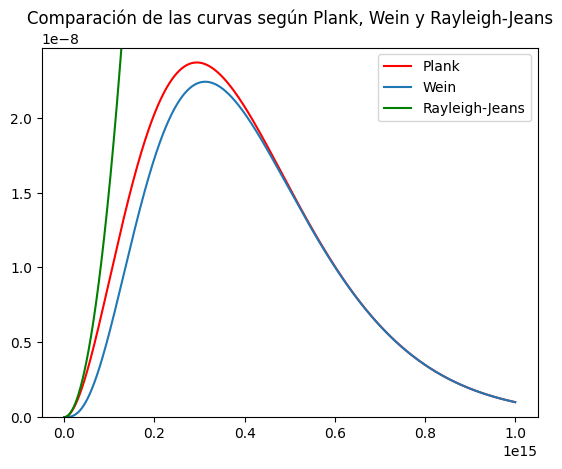

In [6]:
from scipy.constants import h, c, k

'''def plank(pi, f, c, h, k,T):
    num1 = 8*pi*f*f
    num2 = h*f
    denom1 = c*c*c
    denom2 = (np.e**((h*f)/(k*T))) -1
    return (num1*num2)/(denom1*denom2)'''
def plank(pi, f, c, h, k, T):
    A = 2*h*(f**3)/(c**2)
    B = (np.e**(h*f/(k*T)) )- 1
    return A/B

def wein(f, h, c, k, T):
    A = 2*h*(f**3)/(c**2)
    B = np.e**((-h*f)/(k*T))
    return A*B

def rayleigh(f, c, k, T):
    A = 2*f**2*k*T
    B = c**2
    return A/B

F = np.linspace(1, 1e15, 5000)

Plank = plank(pi, F, c, h, k, 5000)
Wein = wein(F, h, c, k, 5000)
Rayleigh = rayleigh(F, c, k, 5000)

plt.plot(F, Plank, label = 'Plank', color = 'red')
plt.plot(F, Wein, label = 'Wein')
plt.plot(F, Rayleigh, label = 'Rayleigh-Jeans', color = 'green')
plt.ylim(min(Plank),max(Plank)+1e-9)
plt.title('Comparación de las curvas según Plank, Wein y Rayleigh-Jeans')
plt.legend()
plt.show()


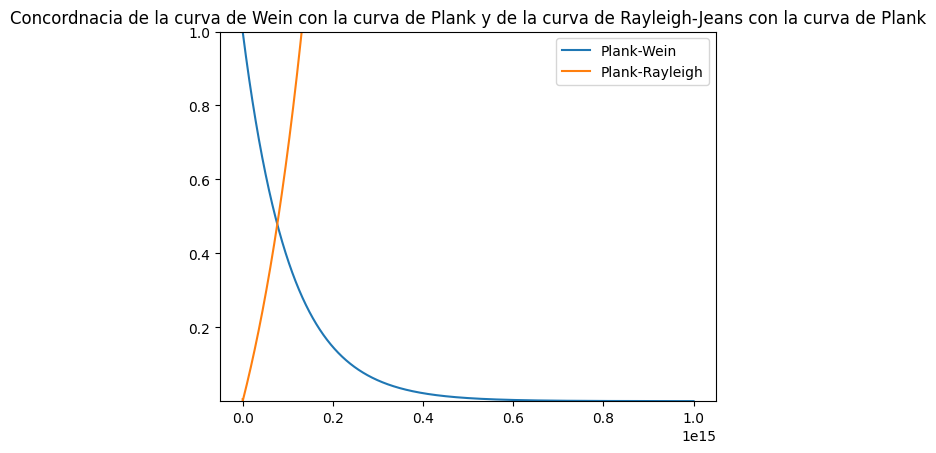

In [45]:
#Comparacion Plank-Wein
from decimal import Decimal

Plank_Wein = []
for i in range(len(Plank)):
    dif = (Plank[i] - Wein[i])/Plank[i]
    dif = abs(dif)
    Plank_Wein.append(dif)

Plank_Rayleigh = []
for i in range(len(Plank)):
    dif = (Plank[i] - Rayleigh[i])/Plank[i]
    dif = abs(dif)
    Plank_Rayleigh.append(dif)

'''centinela = True
while centinela == True and i<len(Plank_Wein):
    if Plank_Wein[i] < 0.1:
        centinela = False
        print(centinela)
        num = str(Plank_Wein[i])
        print("Frecuencia a la que la curva de Wein se aproxima con un error de menos de 10% a la curva de Plank", num, "Hz")
    i +=1

i=0
centinela = True
while centinela == True and i<len(Plank_Rayleigh):
    if Plank_Rayleigh[i] > 0.1:
        #print(i)
        centinela = False
        #print(F[i])
        print("Frecuencia a la que la curva de Rayleigh-Jean se aleja con un error de más de 10% o a la curva de Plank", F[i], "Hz")
    i +=1'''


plt.plot(F, Plank_Wein, label = 'Plank-Wein')
plt.plot(F, Plank_Rayleigh, label = 'Plank-Rayleigh')
plt.ylim(min(Plank_Wein),max(Plank_Wein))
plt.title('Concordnacia de la curva de Wein con la curva de Plank y de la curva de Rayleigh-Jeans con la curva de Plank')
plt.legend()
plt.show()


Para el análisis de concordancia de las curvas, se realizó una comparación entre cada uno de los datos obtenidos en las listas, y se calculó el error porcentual de estos. El resultado se evidencia en la gráfica anterior. En esta, podemos ver como la curva generada por la teoría de Wein tiende a 0 a en frecuencias altas. Por otro lado, la teoría de Rayleigh-Jean sólo está próxima a cero en frecuencias pequeñas. Tiene sentido, pues como expuesto en el libro de Zettili, Quantum Mechanics, Concepts and Applications (2009), la aproximación de Rayleigh-Jeans falla para altas frecuencias, mientras que la aproximación de Wein falla para bajas frecuencias. 

# Referencias

Wallace, J. & Hobbs, P. (2006)  *Atmospheric Science* (2nd ed.) Academic Press

Unidata. (2022, October 3). *MetPy Mondays #252 - Blackbody Radiation and the Plank Function* [Video]. YouTube. https://www.youtube.com/watch?v=FdGfPX43gBM


N. Zettili. (2009) *Quantum Mechanics, Concepts and Applications*
 